<a href="https://colab.research.google.com/github/cedricbansah/new-york-housing-eda/blob/master/ny_housing_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#reading the dataset

data = pd.read_csv('AB_NYC_2019.csv')
data.shape

(48895, 16)

In [3]:
data.info()   #get summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
#  select the necessary features for model

df = data[['neighbourhood_group', 'neighbourhood', 'room_type', 'price']]
df.head()

,neighbourhood_group,neighbourhood,room_type,price
0,Brooklyn,Kensington,Private room,149
1,Manhattan,Midtown,Entire home/apt,225
2,Manhattan,Harlem,Private room,150
3,Brooklyn,Clinton Hill,Entire home/apt,89
4,Manhattan,East Harlem,Entire home/apt,80


In [8]:
df.describe()  

,price
count,48895.000000
mean,152.720687
std,240.154170
min,0.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


In [52]:
price = pd.Series(df['price'])
price.head(10)

0    149
1    225
2    150
3     89
4     80
5    200
6     60
7     79
8     79
9    150
Name: price, dtype: int64

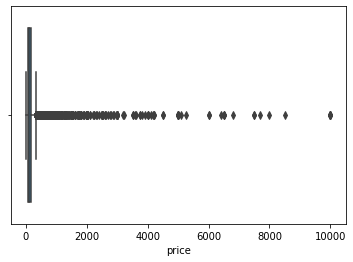

In [60]:
sns.boxplot(price)

In [63]:
pq1 = price.quantile(0.25)
median = price.median()
pq3 = price.quantile(0.75)
iqr = pq3 - pq1
print('IQR: ', iqr)

IQR:  106.0


In [95]:
lower_limit = pq1 + 1.5 *iqr
upper_limit = pq3 - 1.5 *iqr
print('Outlier Upper Limit: ', upper_limit)
print('Outlier Lower Limit: ', lower_limit)

Outlier Upper Limit:  16.0
Outlier Lower Limit:  228.0


In [102]:
newdf = df.loc[((df['price'] > lower_limit) | (df['price'] < upper_limit))]
newdf

,neighbourhood_group,neighbourhood,room_type,price
20,Brooklyn,Williamsburg,Entire home/apt,299
61,Manhattan,Chelsea,Entire home/apt,375
62,Manhattan,Upper East Side,Entire home/apt,250
68,Brooklyn,Williamsburg,Entire home/apt,275
71,Manhattan,East Village,Entire home/apt,230
...,...,...,...,...
48833,Manhattan,Financial District,Entire home/apt,475
48839,Brooklyn,Sheepshead Bay,Private room,800
48842,Manhattan,Chelsea,Entire home/apt,350
48856,Brooklyn,Bedford-Stuyvesant,Entire home/apt,345


In [104]:
newdf['neighbourhood_group'].value_counts()

Manhattan        5024
Brooklyn         1708
Queens            284
Bronx              44
Staten Island      25
Name: neighbourhood_group, dtype: int64

In [105]:
manhattan_df = newdf[newdf['neighbourhood_group'] == 'Manhattan']
brooklyn_df = newdf[newdf['neighbourhood_group'] == 'Brooklyn']
bronx_df = newdf[newdf['neighbourhood_group'] == 'Bronx']
queens_df = newdf[newdf['neighbourhood_group'] == 'Queens']
staten_df = newdf[newdf['neighbourhood_group'] == 'Staten Island']  

In [106]:
def count_values(data, column):
  vc = data[column].value_counts()
  count_plot = sns.countplot(data[column])
  return vc 
  return count_plot

Entire home/apt    4541
Private room        456
Shared room          27
Name: room_type, dtype: int64

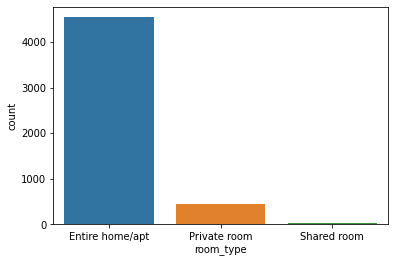

In [107]:
count_values(data=manhattan_df, column='room_type')

Entire home/apt    1559
Private room        140
Shared room           9
Name: room_type, dtype: int64

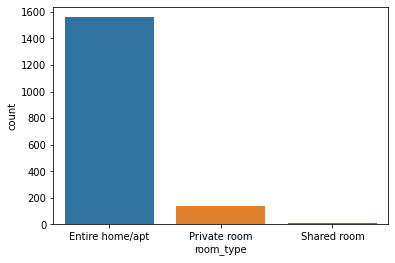

In [108]:
count_values(data=brooklyn_df, column='room_type')

Entire home/apt    244
Private room        32
Shared room          8
Name: room_type, dtype: int64

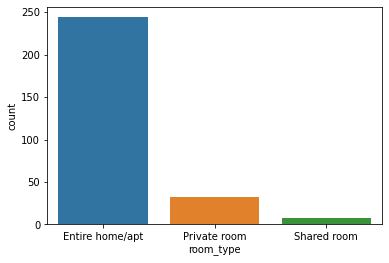

In [109]:
count_values(data=queens_df, column='room_type')

Entire home/apt    33
Private room       10
Shared room         1
Name: room_type, dtype: int64

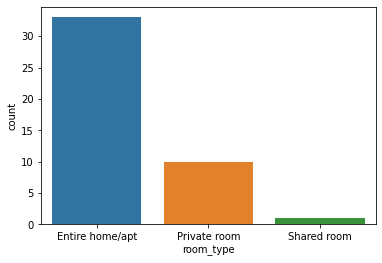

In [110]:
count_values(data=bronx_df, column='room_type')

Entire home/apt    22
Private room        2
Shared room         1
Name: room_type, dtype: int64

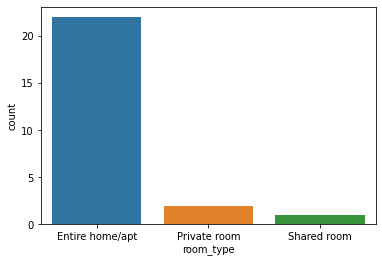

In [111]:
count_values(data=staten_df, column='room_type')